# Trabalho de Conclusão de Curso - Projeto Final

# BI MASTER - BUSINESS INTELLIGENCE MASTER - 
# SISTEMAS INTELIGENTES DE APOIO À DECISÃO EM NEGÓCIOS 

## Aluno: Fábio Mendonça dos Santos

## Matricula: 201.190.260 

## Orientador : Professor Leonardo Alfredo Forero Mendonza

# Descrição do Notebook

Este notebook realiza a classificação dos sentimentos dos tweets e também 

das emoções, utilizando as bibliotecas Afinn e nltk(vader_lexicon) 

para a classificar os sentimentos e a biblioteca text2emotion para a análise de 

emoções.

Para realizar as classificação de sentimentos e emoções é utilizado o arquivo 

tweets_csv_projeto.csv, gerado pelo notebook tcc_fabio_tweets_concat_csv.

Após o término das classificações, é gravado um novo arquivo com as classes e os 

scores das classificações de sentimentos e emoções, o arquivo ,

tweets_csv_classified.csv.


## Mapear o drive para carregar base de tweets

In [ ]:
# Mapeia o drive para ao final salvar o arquivo com os tweets
from google.colab import drive
drive.mount('/content/drive')

import os
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
path = '/content/drive/MyDrive/tweets/' ### pasta na qual está o arquivo 
os.chdir(path)

Mounted at /content/drive


In [ ]:
tweets = pd.read_csv(path+'tweets_csv_projeto.csv',
                     #index_col=None, header=0, 
                     engine='python',sep=';') 
df.head()
tweets.head()

,created_date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2021-12-20 18:54:55,Of course there would be a Cracker Barrel in S...,diegornelas,False,0,NaN,0,"Bonita, CA"
1,2021-12-20 18:54:54,This book should be an interesting read. https...,fmworsley,False,0,NaN,0,"Houston, TX"
2,2021-12-20 18:54:54,Plan 9 Crunch: All About Cult Films: Criswell:...,PoliticalSurf,False,0,NaN,0,Utah
3,2021-12-20 18:54:54,@jonbonjovi @BonJovi \nRemember 10 years ago w...,kchassiephoto,False,0,NaN,0,"Dallas, TX"
4,2021-12-20 18:54:54,It’s soooooo yachty… https://t.co/S4bBEiPvnR,YachtRockShow,False,0,NaN,0,YachtRockShow@gmail.com


In [ ]:
tweets.shape

(210303, 8)

In [ ]:
tweets['word_count'] = tweets['tweet'].apply(lambda x: len(str(x).split()))
tweets.head()

,created_date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count
0,2021-12-20 18:54:55,Of course there would be a Cracker Barrel in S...,diegornelas,False,0,NaN,0,"Bonita, CA",11
1,2021-12-20 18:54:54,This book should be an interesting read. https...,fmworsley,False,0,NaN,0,"Houston, TX",8
2,2021-12-20 18:54:54,Plan 9 Crunch: All About Cult Films: Criswell:...,PoliticalSurf,False,0,NaN,0,Utah,14
3,2021-12-20 18:54:54,@jonbonjovi @BonJovi \nRemember 10 years ago w...,kchassiephoto,False,0,NaN,0,"Dallas, TX",20
4,2021-12-20 18:54:54,It’s soooooo yachty… https://t.co/S4bBEiPvnR,YachtRockShow,False,0,NaN,0,YachtRockShow@gmail.com,4


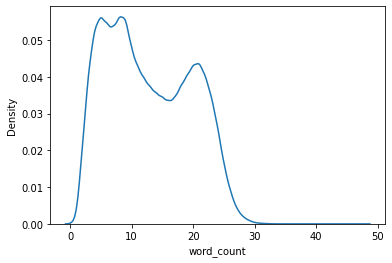

In [ ]:
# distribuição da quantidade de palavras nos tweets 
import seaborn as sns
sns.distplot(tweets.word_count, hist=False);

## Análise de Sentimentos

## Agora vamos testar as bibliotecas para análises de sentimentos e emoções!


In [ ]:
# Bibliotecas para análise de sentimentos e emoções

# https://pypi.org/project/afinn/
!pip install Afinn
from afinn import Afinn

# https://www.nltk.org/
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
afinn = Afinn()
sid = SentimentIntensityAnalyzer()

### Text2emotion: Python package to detect emotions from textual data
!pip install text2emotion
import text2emotion as te

     |████████████████████████████████| 52 kB 876 kB/s 
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=383da0f553afffe6ef6005cbb9bb390cb80fc060caa2811a06b4d150ff24d123
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built Afinn
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
     |████████████████████████████████| 57 kB 3.8 MB/s 
     |████████████████████████████████| 170 kB 25.8 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=1a25b509fecf8dcd41fbfa6b4a63198eccfef8d0258bc3c5dca789dd29de8b11
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenize

# Vamos agora aplicar a nossa base de dados!

In [ ]:
%%time

#percorro todos os tweets avaliando o sentimento e emoções
### https://towardsdatascience.com/text2emotion-python-package-to-detect-emotions-from-textual-data-b2e7b7ce1153
sentiment_afinn = []
sentiment_afinn_class = []
sentiment_nltk = []
sentiment_nltk_class = []
text2emotion_emotion_score = []
text2emotion_emotion_class = []

for tweet in tweets.tweet:
  emotions = {}  
  afinn_score = afinn.score(tweet)
  sentiment_afinn.append(afinn_score)
  sentiment_afinn_class.append('positive' if afinn_score>0 else 'neutral' if afinn_score == 0 else 'negative')

  nltk_score = sid.polarity_scores(tweet).get('compound')
  sentiment_nltk.append(nltk_score)
  sentiment_nltk_class.append('positive' if nltk_score>0 else 'neutral' if nltk_score == 0 else 'negative')
  ## Detecta as emoções no texto do tweet
  emotions =  te.get_emotion(tweet) ### retorna um dicinário com a classe  e o score 
  text2emotion_emotion_score.append(max(emotions.values())) ## obtem o maior valor do score ###https://datagy.io/python-get-dictionary-key-with-max-value/
  text2emotion_emotion_class.append(max(emotions,key=emotions.get))    ## obtem o maior valor da classe
  
    
# Salvo no dataframe
tweets['SentimentAFINN'] = sentiment_afinn 
tweets['SentimentAFINN_class'] = sentiment_afinn_class 
tweets['SentimentNLTK'] = sentiment_nltk 
tweets['SentimentNLTK_class'] = sentiment_nltk_class 
tweets['Emotion_score'] = text2emotion_emotion_score
tweets['Emotion_class'] = text2emotion_emotion_class

CPU times: user 3h 7min 28s, sys: 15min 9s, total: 3h 22min 37s
Wall time: 3h 22min 46s


In [ ]:
tweets.head()

,created_date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class,Emotion_score,Emotion_class
0,2021-12-20 18:54:55,Of course there would be a Cracker Barrel in S...,diegornelas,False,0,NaN,0,"Bonita, CA",11,0.0,neutral,0.0000,neutral,1.0,Fear
1,2021-12-20 18:54:54,This book should be an interesting read. https...,fmworsley,False,0,NaN,0,"Houston, TX",8,2.0,positive,0.4019,positive,1.0,Happy
2,2021-12-20 18:54:54,Plan 9 Crunch: All About Cult Films: Criswell:...,PoliticalSurf,False,0,NaN,0,Utah,14,0.0,neutral,0.0000,neutral,1.0,Sad
3,2021-12-20 18:54:54,@jonbonjovi @BonJovi \nRemember 10 years ago w...,kchassiephoto,False,0,NaN,0,"Dallas, TX",20,3.0,positive,0.5848,positive,0.5,Happy
4,2021-12-20 18:54:54,It’s soooooo yachty… https://t.co/S4bBEiPvnR,YachtRockShow,False,0,NaN,0,YachtRockShow@gmail.com,4,0.0,neutral,0.0000,neutral,0.0,Happy


In [ ]:
# Tirar hora da data para conseguir agrupar os dados
import re
pattern = ' [0-2][0-9]:[0-5][0-9]:[0-5][0-9]'  
timestamps = []
for timestamp in tweets.created_date:
  timestamps.append(re.sub(pattern, '', timestamp))

tweets.date = timestamps
tweets.head()

,created_date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class,Emotion_score,Emotion_class
0,2021-12-20 18:54:55,Of course there would be a Cracker Barrel in S...,diegornelas,False,0,NaN,0,"Bonita, CA",11,0.0,neutral,0.0000,neutral,1.0,Fear
1,2021-12-20 18:54:54,This book should be an interesting read. https...,fmworsley,False,0,NaN,0,"Houston, TX",8,2.0,positive,0.4019,positive,1.0,Happy
2,2021-12-20 18:54:54,Plan 9 Crunch: All About Cult Films: Criswell:...,PoliticalSurf,False,0,NaN,0,Utah,14,0.0,neutral,0.0000,neutral,1.0,Sad
3,2021-12-20 18:54:54,@jonbonjovi @BonJovi \nRemember 10 years ago w...,kchassiephoto,False,0,NaN,0,"Dallas, TX",20,3.0,positive,0.5848,positive,0.5,Happy
4,2021-12-20 18:54:54,It’s soooooo yachty… https://t.co/S4bBEiPvnR,YachtRockShow,False,0,NaN,0,YachtRockShow@gmail.com,4,0.0,neutral,0.0000,neutral,0.0,Happy


In [ ]:
tweets.tail()

,created_date,tweet,username,retweet,nlikes,nreplies,nretweets,near,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class,Emotion_score,Emotion_class
210298,2021-12-23 08:19:16,Of course I get a flat 🥲,dnceao,False,0,NaN,0,"Long Beach, CA",7,0.0,neutral,0.0000,neutral,1.00,Sad
210299,2021-12-23 08:19:15,Went to bed 3 hrs ago. Still not asleep. 🤦‍♀️,rebelliousjess,False,3,NaN,0,"Texas, USA",10,0.0,neutral,0.0000,neutral,0.50,Angry
210300,2021-12-23 08:19:14,@YaOnlyLivvOnce Nice,briggs_charles,False,0,1.473704e+18,0,"North Gates, NY",2,3.0,positive,0.4215,positive,1.00,Happy
210301,2021-12-23 08:19:14,@ivoted4djt @fox13seattle Nobody cares about S...,UMADBRO2587,False,1,1.473931e+18,0,My 🏠,15,2.0,positive,0.4588,positive,0.50,Sad
210302,2021-12-23 08:19:12,@reallysadcow That’s fair. I’ve never lived cl...,torihatesbacon,False,0,1.473931e+18,0,"Statesville, NC",20,2.0,positive,0.1655,positive,0.33,Happy


In [ ]:
# calcular a média dos sentimetos para toda a base
mean_sentiments = tweets.groupby('created_date').mean()
mean_sentiments.head()

,retweet,nlikes,nreplies,nretweets,word_count,SentimentAFINN,SentimentNLTK,Emotion_score
created_date,,,,,,,,
2021-10-29 21:03:24,False,0.0,NaN,0.0,15.0,4.0,0.57190,0.670
2021-10-29 21:03:26,False,0.0,NaN,0.0,17.5,0.0,0.41735,0.835
2021-10-29 21:03:27,False,0.0,1.454189e+18,0.0,20.5,1.0,0.16250,0.465
2021-10-29 21:03:28,False,0.5,1.454192e+18,0.0,14.5,-3.5,-0.56775,1.000
2021-10-29 21:03:29,False,1.0,NaN,2.0,20.0,-2.0,0.00000,1.000


###AFINN

Finn Årup Nielsen, "A new ANEW: evaluation of a word list for sentiment analysis in microblogs", Proceedings of the ESWC2011 Workshop on 'Making Sense of Microposts': Big things come in small packages. Volume 718 in CEUR Workshop Proceedings: 93-98. 2011 May. Matthew Rowe, Milan Stankovic, Aba-Sah Dadzie, Mariann Hardey (editors)
Paper with supplement: http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6006/pdf/imm6006.pdf

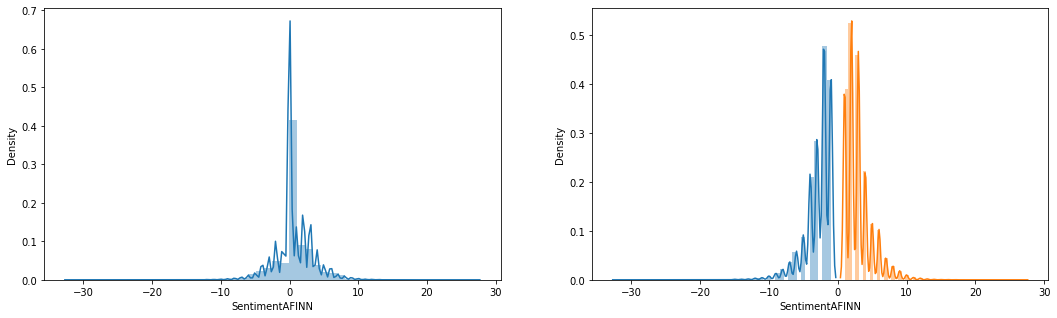

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(18,5))
sns.distplot(tweets.SentimentAFINN, label = 'polarity', ax=axs[0]);

negative_tweets = tweets[tweets.SentimentAFINN_class == 'negative']
positive_tweets = tweets[tweets.SentimentAFINN_class == 'positive']
neutral_tweets = tweets[tweets.SentimentAFINN_class == 'neutral']
sns.distplot(negative_tweets.SentimentAFINN, label = 'negative');
sns.distplot(positive_tweets.SentimentAFINN, label = 'positive');

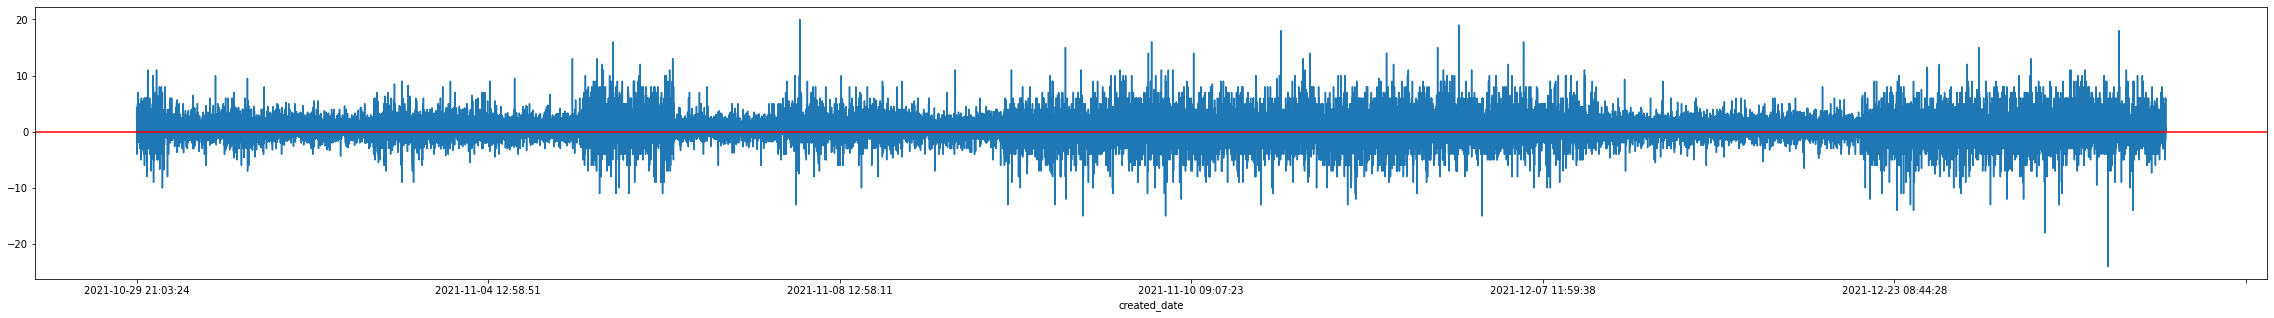

In [ ]:
chart = mean_sentiments.SentimentAFINN.plot(figsize=(40,5)); # se quiser aumentar o tamanho do gráfico, passar como parâmetro: figsize=(10,5)
plt.axhline(y=0, color='r', linestyle='-');
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

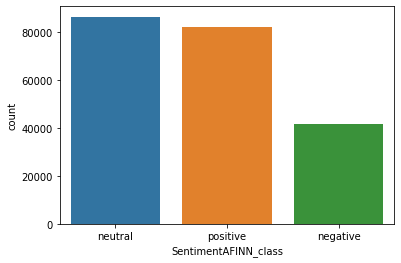

In [ ]:
sns.countplot(x='SentimentAFINN_class', data=tweets);

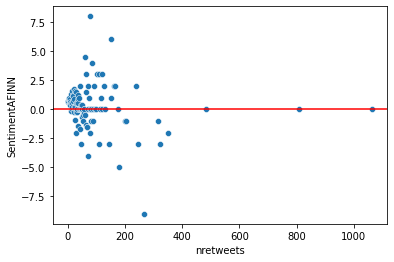

In [ ]:
mean_by_nretweets = tweets.groupby('nretweets').mean()
mean_by_nretweets=mean_by_nretweets[0:234] # retirar os últimos 3 que são muito extremos

# fig, axs = plt.subplots())
sns.scatterplot(x=mean_by_nretweets.index, y="SentimentAFINN", data=mean_by_nretweets)
plt.axhline(y=0, color='r', linestyle='-');

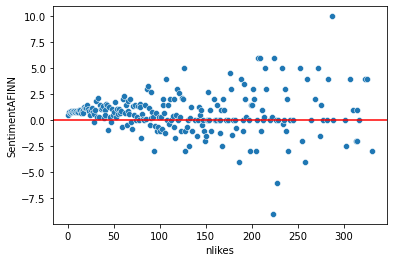

In [ ]:
mean_by_nlikes = tweets.groupby('nlikes').mean()
mean_by_nlikes=mean_by_nlikes[0:234] # retirar os últimos 3 que são muito extremos
sns.scatterplot(x=mean_by_nlikes.index, y="SentimentAFINN", data=mean_by_nlikes)
plt.axhline(y=0, color='r', linestyle='-');

### NLTK

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

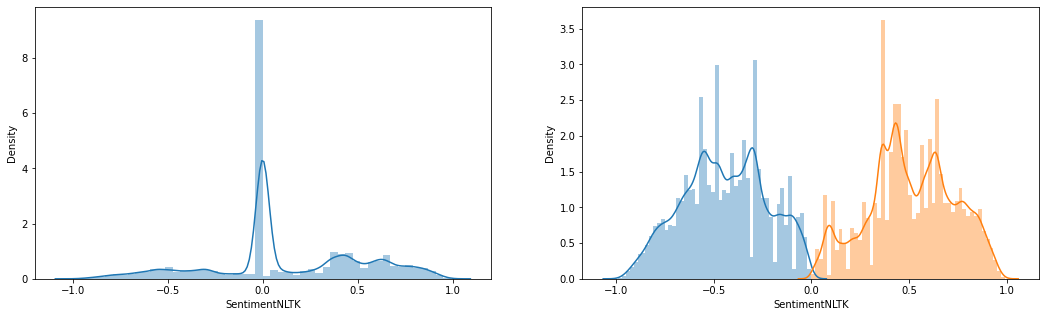

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(18,5))
sns.distplot(tweets.SentimentNLTK, label = 'polarity', ax=axs[0]);

negative_tweets = tweets[tweets.SentimentNLTK_class == 'negative']
positive_tweets = tweets[tweets.SentimentNLTK_class == 'positive']
sns.distplot(negative_tweets.SentimentNLTK, label = 'negative');
sns.distplot(positive_tweets.SentimentNLTK, label = 'positive');

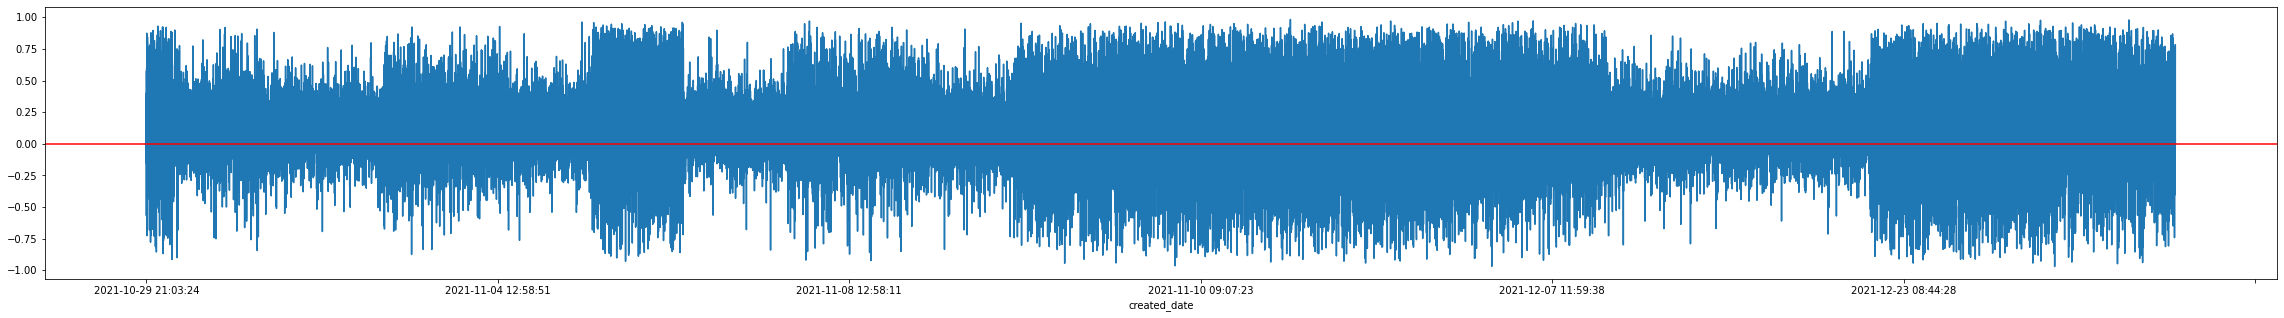

In [ ]:
mean_sentiments.SentimentNLTK.plot(figsize=(40,5));
plt.axhline(y=0, color='r', linestyle='-');

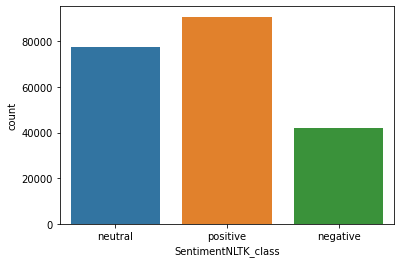

In [ ]:
sns.countplot(x='SentimentNLTK_class', data=tweets);

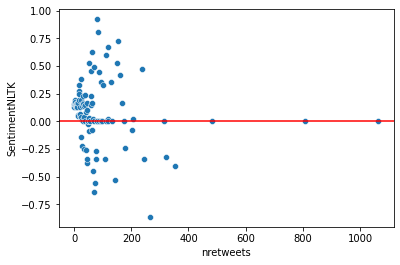

In [ ]:
mean_by_nretweets = tweets.groupby('nretweets').mean()
mean_by_nretweets=mean_by_nretweets[0:234] # retirar os últimos 3 que são muito extremos

# fig, axs = plt.subplots())
sns.scatterplot(x=mean_by_nretweets.index, y="SentimentNLTK", data=mean_by_nretweets)
plt.axhline(y=0, color='r', linestyle='-');

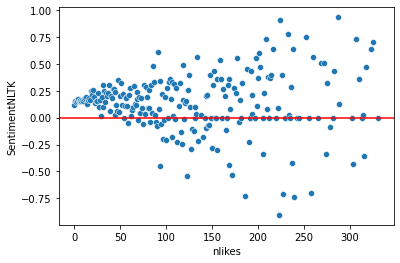

In [ ]:
mean_by_nlikes = tweets.groupby('nlikes').mean()
mean_by_nlikes=mean_by_nlikes[0:234] # retirar os últimos 3 que são muito extremos
sns.scatterplot(x=mean_by_nlikes.index, y="SentimentNLTK", data=mean_by_nlikes)
plt.axhline(y=0, color='r', linestyle='-');

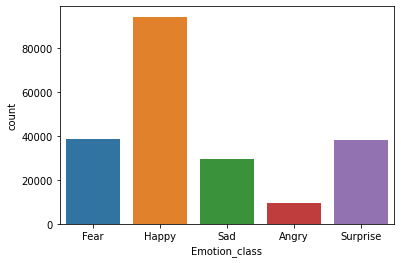

In [ ]:
sns.countplot(x='Emotion_class', data=tweets);

In [ ]:
### Salva em um arquivo *.csv
path = '/content/drive/MyDrive/tweets/'
tweets.to_csv('tweets_csv_classified.csv', sep=';', index=False)